In [1]:
# If running on Colab, uncomment the next line
# %tensorflow_version 2.x

# device_name = tf.test.gpu_device_name()
# print('GPU not found.') if device_name != '/device:GPU:0' else print('Found GPU at: {}'.format(device_name))

In [2]:
from utils.dataset_functions import create_dataset, unwrap_client_data
from utils.image_processing import *
from utils.unet import initialize_unet
from utils.federated_averaging import federated_averaging
from utils.visualization import compare_results_testset

In [3]:
imagePath0 = 'data/Laser Powder Bed Fusion/0/' # Post Spreading Images
imagePath1 = 'data/Laser Powder Bed Fusion/1/' # Post Fusion Images
npyPath = 'data/Laser Powder Bed Fusion/annotations/' # Annotations

clientIdentifierDict = {
    'client1' : ['0000004', '0000017', '0000018'],
    'client2' : ['0000010', '0000011', '0000015'],
    'client3' : ['0000020', '0000021', '0000022'],
    'client4' : ['0000006', '0000033'],
    'client5' : ['0000014', '0000019', '0000161', '0000216'],
    'client6' : ['0000007', '0000008'],
    'client7' : ['0000012', '0000013'],
    'client8' : ['0000016']
}

datasetImageDict, datasetMaskDict = create_dataset(clientIdentifierDict, 
                                             imagePath0, imagePath1, npyPath, 
                                             tileSize = 128)


client1...
Contains 3 images...
Tiled Image Tensor Shape:  (972, 128, 128, 2)
Tiled Mask Shape:  (972, 128, 128)

client2...
Contains 3 images...
Tiled Image Tensor Shape:  (972, 128, 128, 2)
Tiled Mask Shape:  (972, 128, 128)

client3...
Contains 3 images...
Tiled Image Tensor Shape:  (972, 128, 128, 2)
Tiled Mask Shape:  (972, 128, 128)

client4...
Contains 2 images...
Tiled Image Tensor Shape:  (648, 128, 128, 2)
Tiled Mask Shape:  (648, 128, 128)

client5...
Contains 4 images...
Tiled Image Tensor Shape:  (1066, 128, 128, 2)
Tiled Mask Shape:  (1066, 128, 128)

client6...
Contains 2 images...
Tiled Image Tensor Shape:  (648, 128, 128, 2)
Tiled Mask Shape:  (648, 128, 128)

client7...
Contains 2 images...
Tiled Image Tensor Shape:  (648, 128, 128, 2)
Tiled Mask Shape:  (648, 128, 128)

client8...
Contains 1 images...
Tiled Image Tensor Shape:  (324, 128, 128, 2)
Tiled Mask Shape:  (324, 128, 128)


In [4]:
testClients = ['client6']

imageDictTest, segMaskDictTest = {}, {}
for clientID in testClients:
    imageDictTest[clientID] = datasetImageDict[clientID]
    segMaskDictTest[clientID] = datasetMaskDict[clientID]
# unwrap test data from dictionary for easier model evaluation
testImages, testMasks = unwrap_client_data(imageDictTest, segMaskDictTest, testClients)

We already have models saved, so we'll demonstrate a comparison using the saved models.

For client6...
0000007
CL / FL :
Powder IoU =  0.964  /  0.962
Part IoU =  0.971  /  0.972
Defect IoU =  0.473  /  0.391
MeanIoU =  0.803  /  0.775


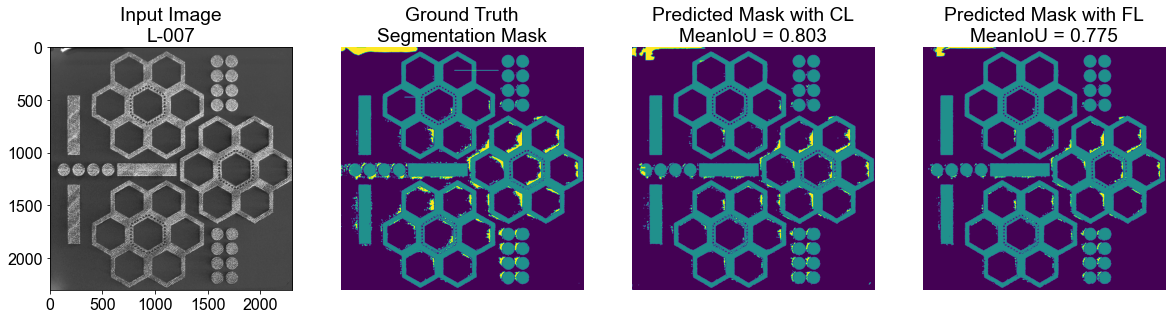

0000008
CL / FL :
Powder IoU =  0.972  /  0.972
Part IoU =  0.96  /  0.953
Defect IoU =  0.602  /  0.587
MeanIoU =  0.845  /  0.837


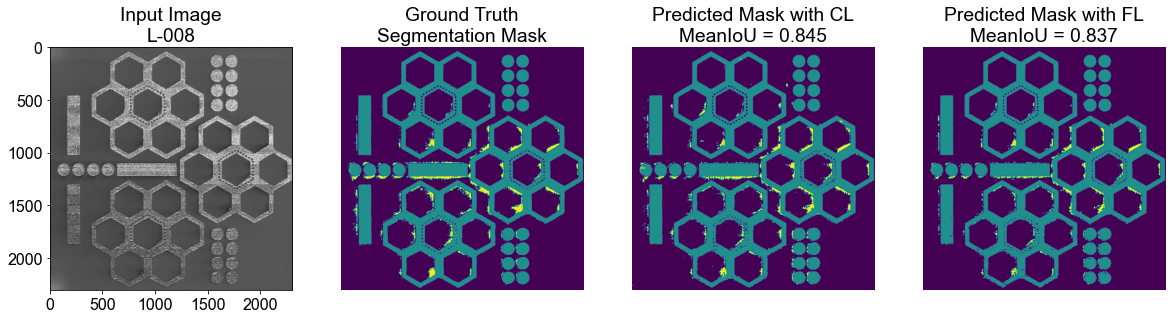

In [5]:
cl_model = tf.keras.models.load_model('saved_models/CL_100_32_8e05_HoldoutPart0708.h5')
fl_model = tf.keras.models.load_model('saved_models/FL_30_10_32_8e05_HoldoutPart0708.h5')

compare_results_testset(cl_model, fl_model, imageDictTest, segMaskDictTest, 
                              testClients, clientIdentifierDict)

Similarly, for clients 7 and 8 as test sets:

For client7...
0000012
CL / FL :
Powder IoU =  0.954  /  0.948
Part IoU =  0.972  /  0.966
Defect IoU =  0.652  /  0.623
MeanIoU =  0.859  /  0.846


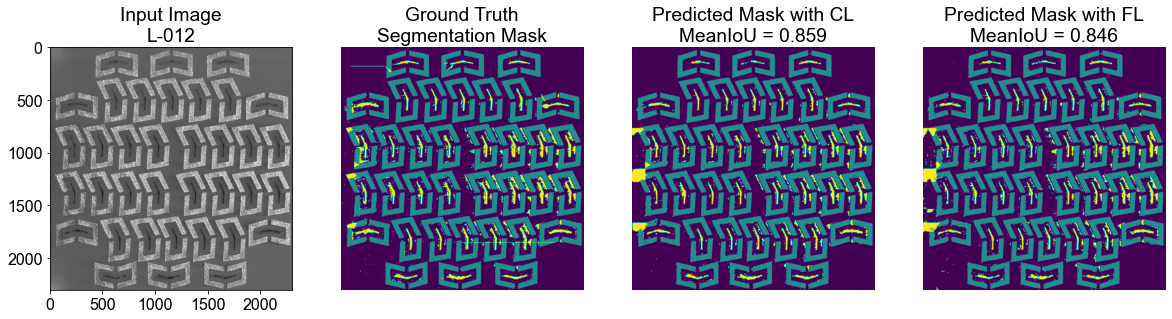

0000013
CL / FL :
Powder IoU =  0.896  /  0.885
Part IoU =  0.882  /  0.896
Defect IoU =  0.552  /  0.548
MeanIoU =  0.777  /  0.777


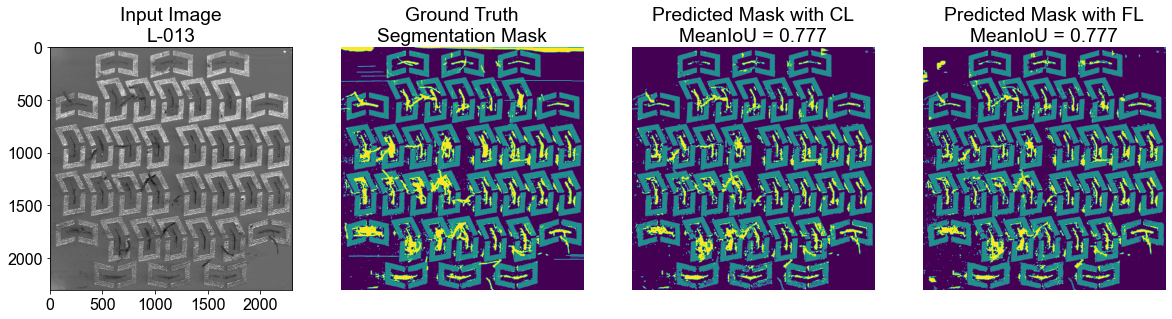

In [6]:
testClients = ['client7']

imageDictTest, segMaskDictTest = {}, {}
for clientID in testClients:
    imageDictTest[clientID] = datasetImageDict[clientID]
    segMaskDictTest[clientID] = datasetMaskDict[clientID]
# unwrap test data from dictionary for easier model evaluation
testImages, testMasks = unwrap_client_data(imageDictTest, segMaskDictTest, testClients)

cl_model = tf.keras.models.load_model('saved_models/CL_100_32_8e05_HoldoutPart1213.h5')
fl_model = tf.keras.models.load_model('saved_models/FL_30_10_32_8e05_HoldoutPart1213.h5')

compare_results_testset(cl_model, fl_model, imageDictTest, segMaskDictTest, 
                              testClients, clientIdentifierDict)

For client8...
0000016
CL / FL :
Powder IoU =  0.978  /  0.983
Part IoU =  0.761  /  0.788
Defect IoU =  0.465  /  0.574
MeanIoU =  0.735  /  0.782


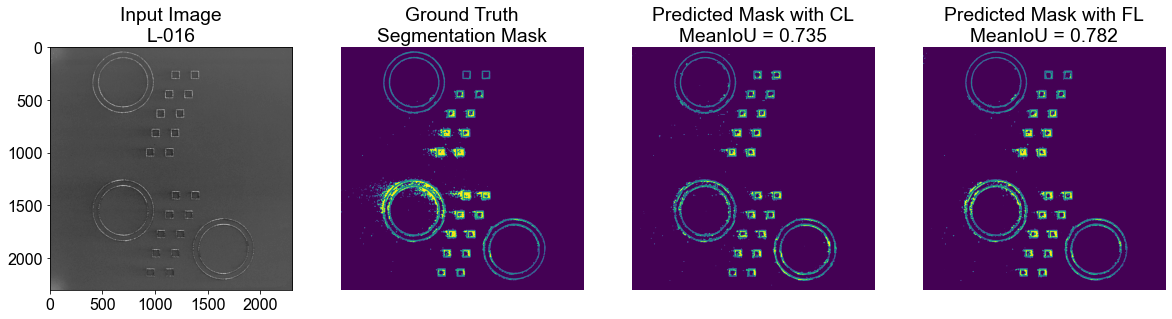

In [7]:
testClients = ['client8']

imageDictTest, segMaskDictTest = {}, {}
for clientID in testClients:
    imageDictTest[clientID] = datasetImageDict[clientID]
    segMaskDictTest[clientID] = datasetMaskDict[clientID]
# unwrap test data from dictionary for easier model evaluation
testImages, testMasks = unwrap_client_data(imageDictTest, segMaskDictTest, testClients)

cl_model = tf.keras.models.load_model('saved_models/CL_100_32_8e05_HoldoutPart16.h5')
fl_model = tf.keras.models.load_model('saved_models/FL_30_10_32_8e05_HoldoutPart16.h5')

compare_results_testset(cl_model, fl_model, imageDictTest, segMaskDictTest, 
                              testClients, clientIdentifierDict)